In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import torch
from utils.channel_model import expModel, PiecewisePathLossModel
from utils.utils import evalModelConvex
from graph_dataset_utils import edge_index_gen
from graph_model import LightningEGNN_net
from utils.old_MNF import MNF_share_solver as old_MNF_share_solver
from utils.MNF_cvxpy import MNF_share_solver

In [12]:
K=3
canal=expModel(indicatrix=True)
Kopts=np.arange(K*(K-1))
print(canal.corte)
print(canal.Ne)
print(canal.umbral)

10.0
2.0
0.01


In [3]:
dist=(canal.rango)*1.5
TA=np.array([[0.0,dist/2],[dist,dist/2]])
NA=np.array([[20,dist/2],[12.0,dist/2]])


mfr=MNF_share_solver(num_task_config=TA.shape[0],num_comm_config=NA.shape[0], channel=canal, Kopts=Kopts)
C_inicial,_,AI,tau, rs=mfr.solve(task_config=TA,comm_config=NA)
c_mapCVXPY=C_inicial

print('C: ',C_inicial)
print('ai: \n', AI)
print('tau: \n', tau)
print('rs: \n', rs)


C:  -6.095816972832372
ai: 
 [0.04745767 0.04745649]
tau: 
 [[0.         0.         0.         0.20030437]
 [0.         0.         0.20969417 0.        ]
 [0.         0.20969935 0.         0.09000034]
 [0.20029942 0.         0.09000256 0.        ]]
rs: 
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.74576659e-02
 0.00000000e+00 0.00000000e+00 6.50432756e-10 0.00000000e+00
 0.00000000e+00 4.74576658e-02 0.00000000e+00 2.34689305e-09
 7.22431323e-10 0.00000000e+00 4.74576674e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.08894260e-10
 0.00000000e+00 0.00000000e+00 4.74564931e-02 0.00000000e+00
 0.00000000e+00 6.59411821e-10 0.00000000e+00 4.74564947e-02
 4.74564931e-02 0.00000000e+00 2.37096708e-09 0.00000000e+00]


In [5]:
dist=(canal.rango)*1.0
TA=np.array([[0.0,0.0],[dist,0],[0.0,dist]])
NA=np.array([[0.0,dist/2]])

rango=0
x=np.linspace(rango,(dist-rango),int(2*((dist))+1))
y=np.linspace(rango,(dist-rango),int(2*((dist))+1))
c_mapCVXPY=np.empty((len(x),len(y)))
mfr=MNF_share_solver(num_task_config=TA.shape[0],num_comm_config=NA.shape[0], channel=canal, Kopts=Kopts)
for c_i, i in enumerate(x):
    for c_j, j in enumerate(y):
        NA[0,0]=i
        NA[0,1]=j
        #print(NA)
        #mfr.update_channel(task_config=TA,comm_config=NA)
        #try: 
        C_inicial,_,_,_, status=mfr.solve(task_config=TA,comm_config=NA)
        c_mapCVXPY[c_i,c_j]=C_inicial
    #except:
        #    pass#c_mapCVXPY[c_i,c_j]=-30



In [6]:
canal2=PiecewisePathLossModel(print_values=False)
dist=(canal2.cutoff_dist)*1.0
TA=np.array([[0.0,0.0],[dist,0],[0.0,dist]])
NA=np.array([[0.0,dist/2]])

rango=0
x=np.linspace(rango,(dist-rango),int(2*((dist))+1))
y=np.linspace(rango,(dist-rango),int(2*((dist))+1))
c_mapCVXPY2=np.empty((len(x),len(y)))
mfr=MNF_share_solver(num_task_config=TA.shape[0],num_comm_config=NA.shape[0], channel=canal2, Kopts=Kopts)
for c_i, i in enumerate(x):
    for c_j, j in enumerate(y):
        NA[0,0]=i
        NA[0,1]=j
        #print(NA)
        #mfr.update_channel(task_config=TA,comm_config=NA)
        #try: 
        C_inicial,_,_,_, status=mfr.solve(task_config=TA,comm_config=NA)
        c_mapCVXPY2[c_i,c_j]=C_inicial
    #except:
        #    pass#c_mapCVXPY[c_i,c_j]=-30

/home/mdelcastillo/proyectos/EGNN-TopologyControl/utils/channel_model.py:55: RuntimeWarning: divide by zero encountered in power
  rate[mask] = special.erf(self.C * np.sqrt(np.power(d[mask], -self.n)))


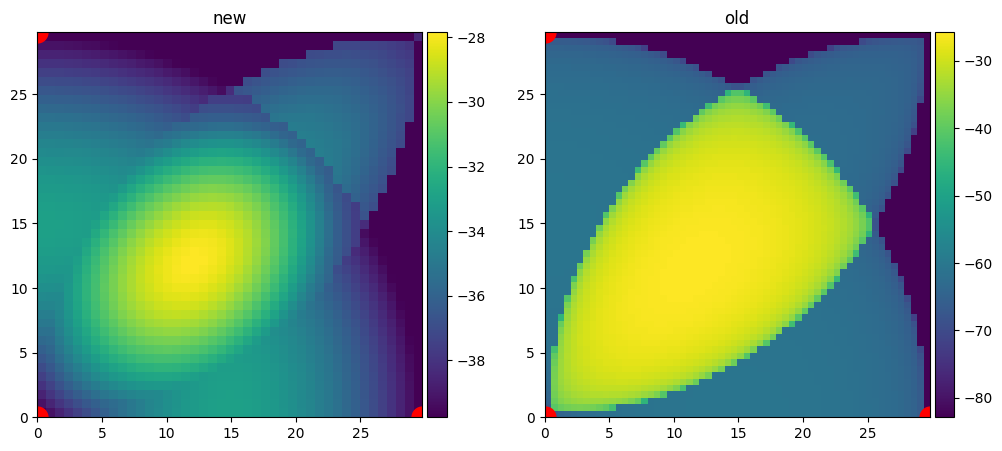

In [9]:
fig =plt.figure(figsize=(12,5))
ax0 = fig.add_subplot(1, 2, 1)

ax0.plot(TA[:,0],TA[:,1],'o', color='red', markersize=15)
#ax0.plot(NA[1,0],NA[1,1],'o', color='blue', markersize=15)
divider = make_axes_locatable(ax0)
cax2 = divider.append_axes("right", size="5%", pad=0.05)
# Plot the matrix with the origin at the bottom left
#max=np.max([c_mapCVXPY.max(),c_mapCVXPY2.max()])
im1= ax0.imshow(c_mapCVXPY.T, cmap=plt.get_cmap('viridis'),origin='lower',extent=[x[0], x[-1], y[0], y[-1]],vmax=c_mapCVXPY.max(), vmin=c_mapCVXPY.min())
#im2= ax0.imshow(c_mapCVXPY, cmap=plt.get_cmap('viridis'),origin='lower',vmax=c_mapCVXPY.max(), vmin=c_mapCVXPY.min())

# #im2= ax1.imshow(c_map, cmap=plt.get_cmap('viridis'),extent=[x[0], x[-1], y[0], y[-1]], vmax=c_map.max(), vmin=c_map.min())
fig.colorbar(im1,cax=cax2)
ax0.set_title('new')


ax1 = fig.add_subplot(1, 2, 2)

ax1.plot(TA[:,0],TA[:,1],'o', color='red', markersize=15)

divider = make_axes_locatable(ax1)
cax2 = divider.append_axes("right", size="5%", pad=0.05)

im2= ax1.imshow(c_mapCVXPY2, cmap=plt.get_cmap('viridis'),origin='lower',extent=[x[0], x[-1], y[0], y[-1]],vmax=c_mapCVXPY2.max(), vmin=c_mapCVXPY2.min())
#im2= ax1.imshow(c_map, cmap=plt.get_cmap('viridis'),extent=[x[0], x[-1], y[0], y[-1]], vmax=c_map.max(), vmin=c_map.min())
fig.colorbar(im2,cax=cax2)
ax1.set_title('old')



plt.show()

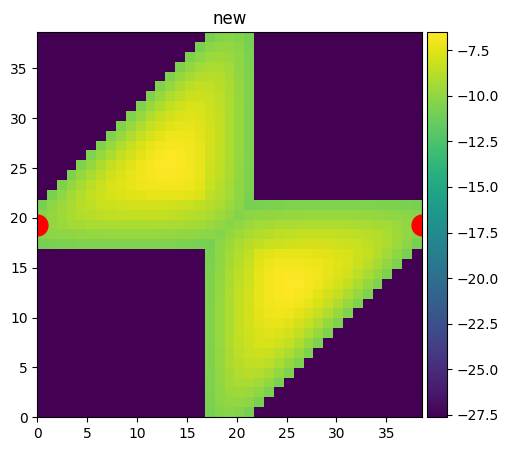

In [11]:
fig =plt.figure(figsize=(12,5))
ax0 = fig.add_subplot(1, 1, 1)

ax0.plot(TA[:,0],TA[:,1],'o', color='red', markersize=15)
#ax0.plot(NA[1,0],NA[1,1],'o', color='blue', markersize=15)
divider = make_axes_locatable(ax0)
cax2 = divider.append_axes("right", size="5%", pad=0.05)
# Plot the matrix with the origin at the bottom left
#max=np.max([c_mapCVXPY.max(),c_mapCVXPY2.max()])
im1= ax0.imshow(c_mapCVXPY.T, cmap=plt.get_cmap('viridis'),origin='lower',extent=[x[0], x[-1], y[0], y[-1]],vmax=c_mapCVXPY.max(), vmin=c_mapCVXPY.min())
#im2= ax0.imshow(c_mapCVXPY, cmap=plt.get_cmap('viridis'),origin='lower',vmax=c_mapCVXPY.max(), vmin=c_mapCVXPY.min())

# #im2= ax1.imshow(c_map, cmap=plt.get_cmap('viridis'),extent=[x[0], x[-1], y[0], y[-1]], vmax=c_map.max(), vmin=c_map.min())
fig.colorbar(im1,cax=cax2)
ax0.set_title('new')


# ax1 = fig.add_subplot(1, 2, 2)

# ax1.plot(TA2[:,0],TA2[:,1],'o', color='red', markersize=15)

# divider = make_axes_locatable(ax1)
# cax2 = divider.append_axes("right", size="5%", pad=0.05)

# im2= ax1.imshow(c_mapCVXPY2, cmap=plt.get_cmap('gray'),origin='lower',extent=[x2[0], x2[-1], y2[0], y2[-1]],vmax=c_mapCVXPY2.max(), vmin=c_mapCVXPY2.min())
# #im2= ax1.imshow(c_map, cmap=plt.get_cmap('viridis'),extent=[x[0], x[-1], y[0], y[-1]], vmax=c_map.max(), vmin=c_map.min())
# fig.colorbar(im2,cax=cax2)
# ax1.set_title('old')



plt.show()

In [13]:
print(np.argmax(c_mapCVXPY))

532


In [12]:
dist2=(canal.rango)*1.5
TA2=np.array([[0.0,0.0],[0.0,dist2],[dist2,0.0]])
NA2=np.array([[0.5*dist2,0.5*dist2],[0.5*dist2,0.5*dist2])
rango=0
x2=np.linspace(rango,(dist2-rango),int(1*((dist2))+1))
y2=np.linspace(rango,(dist2-rango),int(1*((dist2))+1))
c_mapCVXPY2=np.empty((len(x2),len(y2)))
mfr2=old_MNF_share_solver(task_config=TA2,comm_config=NA2, channel=canal, Kopts=Kopts)
for c_i, i in enumerate(x2):
    for c_j, j in enumerate(y2):
        NA2[0,0]=i
        NA2[0,1]=j
        #print(NA)
        mfr2.update_channel(task_config=TA2,comm_config=NA2)
        #try: 
        C_inicial2,_,_,_, status=mfr2.solver()#(task_config=TA,comm_config=NA)
        c_mapCVXPY2[c_i,c_j]=C_inicial2

    #except:
        #   pass


SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3700842515.py, line 3)

In [ ]:
print(c_mapCVXPY2)

In [6]:
import pickle
with open('cvxpy_examples/new_map.pkl', 'wb') as f:
    pickle.dump(c_mapCVXPY, f)

In [ ]:
import pickle
with open('c_mapCVXPY_viejo.pkl', 'wb') as f:
    pickle.dump(c_mapCVXPY, f)

In [ ]:
import pickle
with open('cvxpy_examples/c_mapCVXPY_map.pkl', 'rb') as f:
    c_mapCVXPY2 = pickle.load(f)

In [ ]:
import pickle
with open('cvxpy_examples/c_mapCVXPY_indicatrix_graph_2xgrid.pkl', 'rb') as f:
    c_mapCVXPY2 = pickle.load(f)

In [ ]:
fig =plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)

im2= ax.imshow(c_mapCVXPY, cmap=plt.get_cmap('gray'),\
                vmax=c_mapCVXPY.max(), vmin=c_mapCVXPY.min())
ax.plot(TA[:,0],TA[:,1],'o', color='red', markersize=15)
